In [61]:
%pylab nbagg
%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [62]:
import fastcat.fastcat as fc
from glob import glob

## First I'll look at the detector MTF

### I'll load all of the kernels 

In [63]:
spectra = glob('../fastcat/data/MV_spectra/*.txt')
phantoms = ['Catphan_515','Catphan_MTF']
MV_detectors = glob('../fastcat/data/Detectors/*')

dispatcher={'Catphan_515':fc.Catphan_515,
            'Catphan_MTF':fc.Catphan_MTF}

In [64]:
s = fc.Spectrum()

<IPython.core.display.Javascript object>


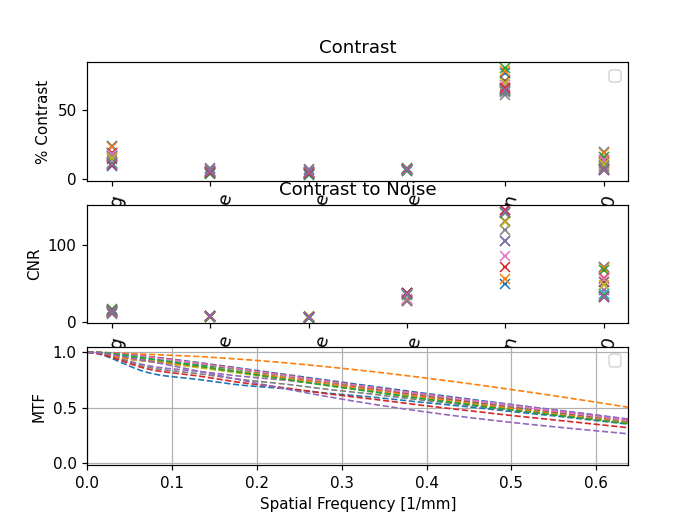

Calculation:  1 / 50
Calculation:  2 / 50
Calculation:  3 / 50
Calculation:  4 / 50
Calculation:  5 / 50
Calculation:  6 / 50
Calculation:  7 / 50
Calculation:  8 / 50
Calculation:  9 / 50
Calculation:  10 / 50
Calculation:  11 / 50
Calculation:  12 / 50
Calculation:  13 / 50
Calculation:  14 / 50
Calculation:  15 / 50
Calculation:  16 / 50
Calculation:  17 / 50
Calculation:  18 / 50
Calculation:  19 / 50
Calculation:  20 / 50
Calculation:  21 / 50
Calculation:  22 / 50
Calculation:  23 / 50
Calculation:  24 / 50
Calculation:  25 / 50
Calculation:  26 / 50
Calculation:  27 / 50
Calculation:  28 / 50
Calculation:  29 / 50
Calculation:  30 / 50
Calculation:  31 / 50
Calculation:  32 / 50
Calculation:  33 / 50
Calculation:  34 / 50
Calculation:  35 / 50
Calculation:  36 / 50
Calculation:  37 / 50
Calculation:  38 / 50
Calculation:  39 / 50
Calculation:  40 / 50
Calculation:  41 / 50
Calculation:  42 / 50
Calculation:  43 / 50
Calculation:  44 / 50
Calculation:  45 / 50
Calculation:  46 / 

No handles with labels found to put in legend.


ratio is None number of photons 0.00013365608978271485
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.021328344994554917
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.005883501953125
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.00013365608978271485
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.02132834499455492
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.005883501953124999
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.00013365608978271485
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.02132834499455492
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.005883501953125001
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.00013365608978271485
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.021328344994554917
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.005883501953125
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.00013365608978271485
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.02132834499455492
(512, 16)
(512,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


ratio is None number of photons 0.005883501953125002
(512, 16)
(512,)


No handles with labels found to put in legend.


In [82]:
contrasts = []
mtfs = []
label = []

fig, axs = plt.subplots(3, 1)

spectra = [ 'kv',
 '../fastcat/data/MV_spectra/C_spectrum_25.txt',
 '../fastcat/data/MV_spectra/C_spectrum_6.txt',
 '../fastcat/data/MV_spectra/W_spectrum_25.txt',
 '../fastcat/data/MV_spectra/W_spectrum_6.txt']

MV_detectors = [
 '../fastcat/data/Detectors/CsI-784-micrometer',
 '../fastcat/data/Detectors/CWO-784-micrometer',
 '../fastcat/data/Detectors/CuGOS-784-micrometer']

phan_map = [
    'air',
    'G4_MUSCLE_SKELETAL_ICRP',
    'Spongiosa_Bone_ICRP',
    'LIVER_ICRP',
    'lung',
    'G4_ADIPOSE_TISSUE_ICRP',
    'G4_BONE_COMPACT_ICRU',
    'Spongiosa_Bone_ICRP'
]

s0 = fc.calculate_spectrum(100, 12, 3, 50)
s0.attenuate(0.2,fc.get_mu(z=13))

for phan in phantoms[:1]:
    phantom = dispatcher[phan]()
    phantom.phan_map = phan_map
    for spectrum in spectra:
        for det in MV_detectors:
            
            if len(spectrum) > 4:
                s.load(spectrum.split('/')[-1].split('.')[0])
            else:
                s = s0
            kernel = fc.Kernel(s, det.split('/')[-1].split('.')[0])
            kernel.get_plot_mtf_real(axs[2])
            mtfs.append([kernel.freq,kernel.mtf])
            angles = np.linspace(0,np.pi*2,480)        

            phantom.return_projs(kernel,s,angles,det_on=False)
            phantom.reconstruct('FDK')
            contrasts.append(phantom.analyse_515(phantom.img[5],axs))
            label.append(spectrum.split('/')[-1].split('.')[0] + det.split('/')[-1].split('.')[0])

<IPython.core.display.Javascript object>


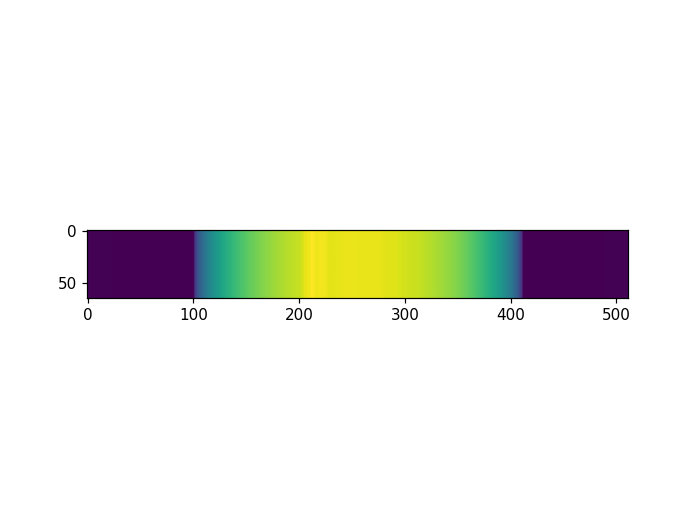

In [83]:
plt.figure()
plt.imshow(phantom.proj[0])
proj1 = phantom.proj[0]

<IPython.core.display.Javascript object>


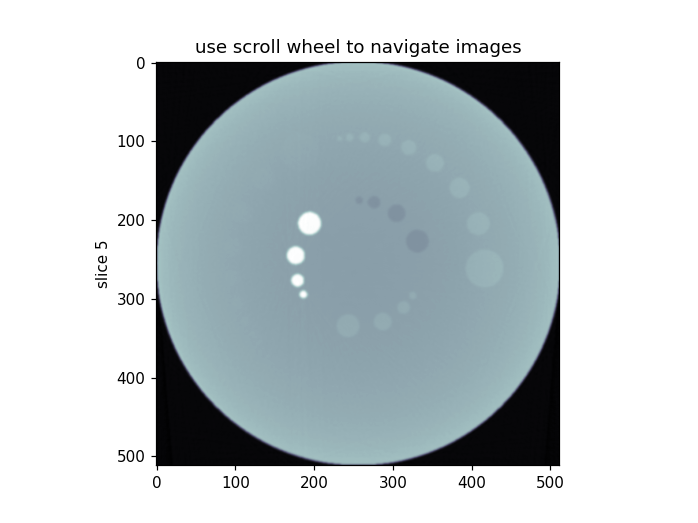

In [84]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind],cmap='bone')
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(phantom.img.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [85]:
np.save('contrasts',contrasts)
np.save('mtfs',mtfs)
np.save('labels',label)

In [87]:
label[0]

'kvCsI-784-micrometer'

In [88]:
# contrasts = np.load('contrasts.npy',allow_pickle=True)
# mtfs = np.load('mtfs.npy')
# labels = np.load('labels.npy')

In [89]:
from matplotlib import cm

In [90]:
inds_i_want = [0,6,12,18,21,24]

In [91]:
cc = np.array([np.array(contrasts[ii][1])[inds_i_want] for ii in range(len(contrasts))])
# ll = np.array([np.array(label[ii]) for ii in range(len(contrasts))])

In [92]:
ll = [label[ii][0] + label[ii][1] + label[ii][2] for ii in range(len(label))]

<IPython.core.display.Javascript object>


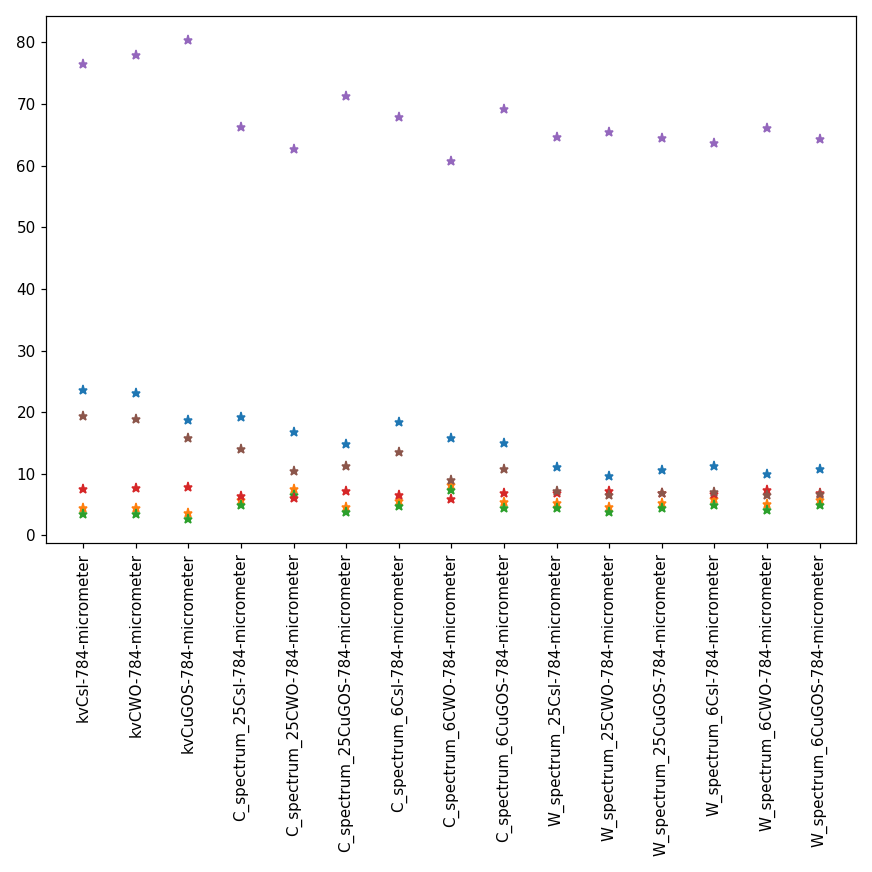

In [93]:
plt.figure(figsize=[8,8])
plt.plot(cc.flatten()[::6],'*')
plt.plot(cc.flatten()[1::6],'*')
plt.plot(cc.flatten()[2::6],'*')
plt.plot(cc.flatten()[3::6],'*')
plt.plot(cc.flatten()[4::6],'*')
plt.plot(cc.flatten()[5::6],'*')
plt.xticks(range(len(label)),labels=label,rotation=90)
plt.tight_layout()

<IPython.core.display.Javascript object>


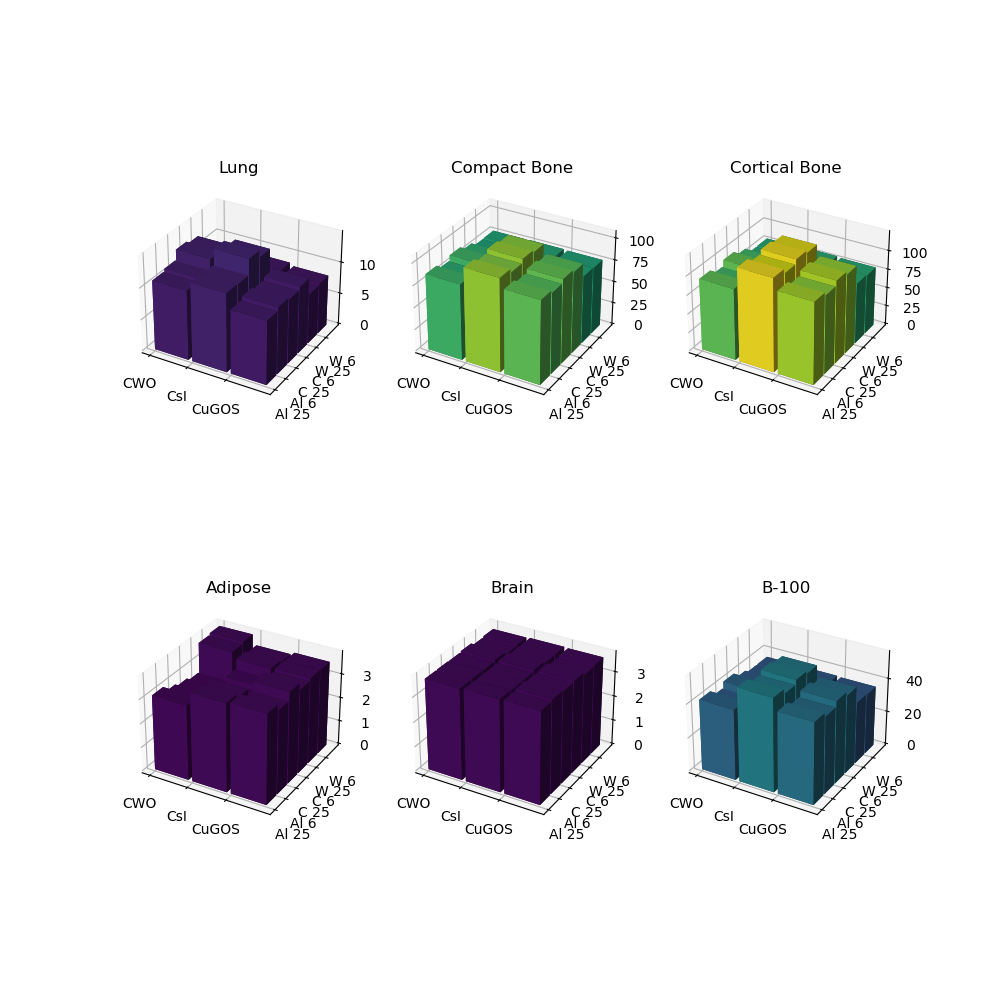

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


In [43]:
inds_i_want = [0,6,12,18,21,24]
shorts = ['Lung','Compact Bone','Cortical Bone','Adipose','Brain','B-100']

contrasts_only = [contrasts[ii][1] for ii in range(len(contrasts))]

contrast_ar = np.array(contrasts_only)[:,inds_i_want]

dets_i_want = [0,3,6]

contrasts_to_plot = contrast_ar[::3,0].reshape([3,6])

lx, ly = contrasts_to_plot.shape

_x = np.arange(lx)
_y = np.arange(ly)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 0.9

specs = [spectra[kk].split('/')[-1].split('_')[0] + ' ' + spectra[kk].split('/')[-1].split('_')[2].split('.')[0] for kk in range(len(spectra))]
detz = [MV_detectors[kk].split('/')[-1].split('-')[0] for kk in range(len(MV_detectors))]

max_height = np.max(contrast_ar[::3,:])   # get range of colorbars so we can normalize
min_height = np.min(0)

fig = plt.figure(figsize=(10, 10))
    
for jj in range(len(inds_i_want)):
    
    contrasts_to_plot = contrast_ar[::3,jj].reshape([3,6]).flatten()#.reshape([len(spectra),int(len(contrasts)/len(spectra))])

    cmap = cm.get_cmap('viridis') # Get desired colormap - you can change this!
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in contrasts_to_plot] 

    ax1 = fig.add_subplot(2,3,jj+1, projection='3d')
    ax1.bar3d(x,y, bottom, width, depth, contrasts_to_plot,color=rgba, zsort='average', shade=True)
    ax1.set_title(shorts[jj])
    ax1.set_yticks(range(len(spectra)))
    ax1.set_yticklabels(sorted(specs))
    ax1.set_xticks(range(len(detz[::3])))
    ax1.set_xticklabels(sorted(detz)[::3])
    plt.tight_layout()
    
#     break

In [88]:
np.array(label)[:,1].reshape([len(spectra),int(len(contrasts)/len(spectra))])

array([['../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt'],
       ['../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al

In [108]:
detz

['CuGOS-392-micrometer',
 'CWO-784-micrometer',
 'CuGOS-784-micrometer',
 'CsI-392-micrometer',
 'CuGOS-336-micrometer',
 'CWO-392-micrometer',
 'CsI-784-micrometer',
 'CWO-261-micrometer',
 'CsI-336-micrometer']

In [89]:
np.array(label)[:,2].reshape([len(spectra),int(len(contrasts)/len(spectra))])

array([['../fastcat/data/Detectors/CWO-261-micrometer',
        '../fastcat/data/Detectors/CWO-392-micrometer',
        '../fastcat/data/Detectors/CWO-784-micrometer',
        '../fastcat/data/Detectors/CsI-336-micrometer',
        '../fastcat/data/Detectors/CsI-392-micrometer',
        '../fastcat/data/Detectors/CsI-784-micrometer',
        '../fastcat/data/Detectors/CuGOS-336-micrometer',
        '../fastcat/data/Detectors/CuGOS-392-micrometer',
        '../fastcat/data/Detectors/CuGOS-784-micrometer'],
       ['../fastcat/data/Detectors/CWO-261-micrometer',
        '../fastcat/data/Detectors/CWO-392-micrometer',
        '../fastcat/data/Detectors/CWO-784-micrometer',
        '../fastcat/data/Detectors/CsI-336-micrometer',
        '../fastcat/data/Detectors/CsI-392-micrometer',
        '../fastcat/data/Detectors/CsI-784-micrometer',
        '../fastcat/data/Detectors/CuGOS-336-micrometer',
        '../fastcat/data/Detectors/CuGOS-392-micrometer',
        '../fastcat/data/Detectors/Cu

In [91]:
contrast_ar[:,0].reshape([len(spectra),int(len(contrasts)/len(spectra))]).flatten()

array([10.94017538, 10.91813642, 10.94120732, 12.33236147, 12.30379796,
       12.30942803, 10.00898376, 10.00442507,  9.98202601, 11.30305439,
       11.2847624 , 11.26505964, 12.20998428, 12.16116432, 12.19630993,
       10.48481183, 10.47977956, 10.45809289, 12.89002102, 12.90404621,
       12.90185399, 14.61528942, 14.6249419 , 14.67340515, 10.11429075,
       10.09519276, 10.09851538, 12.41890821, 12.42877168, 12.46004897,
       13.46521681, 13.49752204, 13.46466291, 10.55510461, 10.56961973,
       10.55533228,  6.9022765 ,  6.91422433,  6.90450925,  8.19008695,
        8.18565598,  8.19404018,  7.91018029,  7.93289181,  7.92613491,
        7.14180457,  7.1456152 ,  7.13077258,  8.48668059,  8.509874  ,
        8.47786037,  8.07174783,  8.08153531,  8.06178995])

<IPython.core.display.Javascript object>


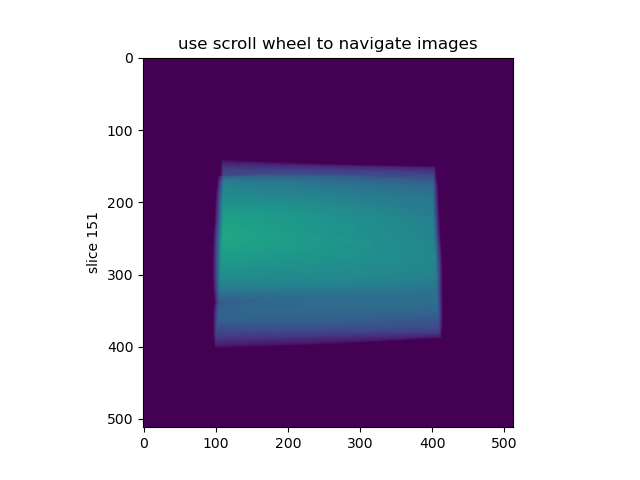

In [10]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(phantom.proj.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()